<a href="https://colab.research.google.com/github/scuarlus/Acompanamiento/blob/main/Trabajo_de_acompa%C3%B1amiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ese código descarga desde la API de Datos Abiertos de Colombia la información de precios de medicamentos en formato JSON, la convierte en un DataFrame de Pandas y prepara el entorno con librerías de análisis estadístico y visualización para poder limpiar, procesar y graficar los datos.

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

url = 'https://www.datos.gov.co/resource/3t73-n4q9.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

Ese código muestra en pantalla la estructura básica del DataFrame df: imprime el número de filas y columnas, y luego visualiza las primeras 7 filas para tener una vista preliminar de los datos.Ese código muestra en pantalla la estructura básica del DataFrame df: imprime el número de filas y columnas, y luego visualiza las primeras 4 filas para tener una vista preliminar de los datos.

In [ ]:
# Análisis inicial

print("=== Estructura del dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
print("Primeras 7 filas:")
display(df.head())

=== Estructura del dataset ===
Filas: 1000, Columnas: 9

Primeras 7 filas:


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor
0,Midazolam,Ampolla,Midazolam 15 mg,ml,Dormicum,Siegfried,11199.8,Alto,3
1,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,3752.866667,Medio,2
2,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,1777.266522,Medio,2
3,Fluoxetina,Capsula,Fluoxetina 20 mg,mg,Fluoxetina,Genfar,329.295281,Medio,2
4,Proximetacaina,Frasco,Proximetacaina 5 mg,ml,Alcaine,Alcon,64184.74576,Medio,2


Ese código descarga la base de datos de precios de medicamentos desde la API de Datos Abiertos de Colombia, la convierte en un DataFrame de Pandas y luego:

df.info() → Muestra información general: número de filas, columnas, nombres de columnas, tipos de datos y cantidad de valores no nulos.

df.describe(include='all') → Genera estadísticas descriptivas de todas las columnas (numéricas y categóricas), como conteos, medias, desviaciones estándar, valores mínimos, máximos y más frecuentes.

In [ ]:
import pandas as pd
import requests

url = 'https://www.datos.gov.co/resource/3t73-n4q9.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   principio_activo        1000 non-null   object
 1   unidad_de_dispensacion  1000 non-null   object
 2   concentracion           1000 non-null   object
 3   unidad_base             1000 non-null   object
 4   nombre_comercial        1000 non-null   object
 5   fabricante              1000 non-null   object
 6   precio_por_tableta      1000 non-null   object
 7   factoresprecio          1000 non-null   object
 8   numerofactor            1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


None


Estadísticas descriptivas:


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,326,18,466,7,427,124,979,3,3
top,Levotiroxina Sodica,Tableta,Metoclopramida 10 mg,mg,Synthroid,Genfar,1750,Medio,2
freq,16,406,10,530,16,68,3,550,550


Ese código convierte las columnas precio_por_tableta y numerofactor a formato numérico, reemplazando comas por puntos para manejar decimales y usando errors='coerce' para transformar en NaN cualquier valor que no pueda convertirse. Esto permite hacer cálculos y gráficas sin errores.

In [ ]:
df['precio_por_tableta'] = pd.to_numeric(df['precio_por_tableta'].astype(str).str.replace(',', '.'), errors='coerce')
df['numerofactor'] = pd.to_numeric(df['numerofactor'].astype(str).str.replace(',', '.'), errors='coerce')

Ese código muestra un resumen general del DataFrame: primero imprime la información estructural (df.info()) con tipos de datos y cantidad de valores no nulos, y luego presenta estadísticas descriptivas (df.describe(include='all') para todas las columnas, incluyendo tanto numéricas como categóricas.

In [ ]:
print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   principio_activo        1000 non-null   object 
 1   unidad_de_dispensacion  1000 non-null   object 
 2   concentracion           1000 non-null   object 
 3   unidad_base             1000 non-null   object 
 4   nombre_comercial        1000 non-null   object 
 5   fabricante              1000 non-null   object 
 6   precio_por_tableta      1000 non-null   float64
 7   factoresprecio          1000 non-null   object 
 8   numerofactor            1000 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


None


Estadísticas descriptivas:


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor
count,1000,1000,1000,1000,1000,1000,1.000000e+03,1000,1000.000000
unique,326,18,466,7,427,124,NaN,3,NaN
top,Levotiroxina Sodica,Tableta,Metoclopramida 10 mg,mg,Synthroid,Genfar,NaN,Medio,NaN
freq,16,406,10,530,16,68,NaN,550,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.250293e+04,NaN,2.080000
std,NaN,NaN,NaN,NaN,NaN,NaN,3.128058e+05,NaN,0.666366
min,NaN,NaN,NaN,NaN,NaN,NaN,4.155779e-01,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.324054e+02,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.810028e+03,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.348724e+04,NaN,3.000000


Principios activos más comunes
El gráfico horizontal muestra los 10 principios activos con mayor frecuencia en el dataset. Este análisis permite identificar qué principios activos dominan el mercado en términos de disponibilidad y presencia en el registro de precios. La concentración de ciertas sustancias en los primeros puestos sugiere que son ampliamente utilizadas en tratamientos recurrentes o de alta demanda, como analgésicos, antibióticos o medicamentos para enfermedades crónicas.
La diferencia en la cantidad entre el primer y el último del top 10 evidencia que unos pocos principios activos concentran gran parte de la oferta, mientras que el resto está más distribuido. Esto podría reflejar tendencias en la prescripción médica, políticas de compra del sistema de salud o necesidades epidemiológicas predominantes en el país.

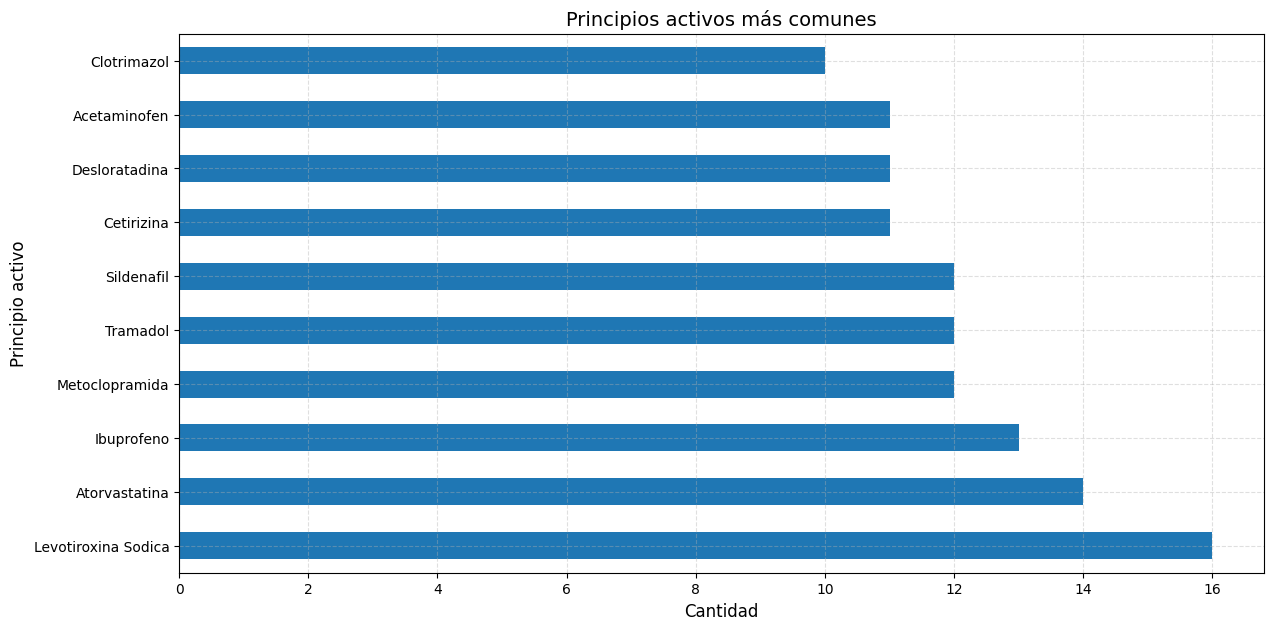

In [ ]:
# 1 Grafica Análisis de principios activos
principios_activos = df['principio_activo'].value_counts().head(10)
plt.figure(figsize=(14, 7))
principios_activos.plot(kind='barh')
plt.title('Principios activos más comunes')
plt.xlabel('Cantidad')
plt.ylabel('Principio activo')
plt.show()

In [ ]:
# === Importar librerías ===
import pandas as pd
import requests
import plotly.express as px

# === Descargar dataset ===
url = 'https://www.datos.gov.co/resource/3t73-n4q9.json'
response = requests.get(url)
data = response.json()

# Crear DataFrame
df = pd.DataFrame(data)

# === Limpieza de datos ===
df['precio_por_tableta'] = pd.to_numeric(df['precio_por_tableta'].astype(str).str.replace(',', '.'), errors='coerce')
df['numerofactor'] = pd.to_numeric(df['numerofactor'].astype(str).str.replace(',', '.'), errors='coerce')

Top 10 fabricantes por precio promedio más bajo
El gráfico evidencia que existen fabricantes cuyo precio promedio por tableta es notablemente inferior al resto, lo que indica que posiblemente se enfocan en la producción de medicamentos genéricos o de bajo costo. La diferencia entre el fabricante más económico y el décimo de la lista es considerable, lo que refleja una amplia dispersión de precios incluso dentro del segmento más barato. Este comportamiento podría estar asociado a estrategias de competitividad en el mercado, diferencias en los costos de producción o variaciones en la forma farmacéutica y distribución.

In [ ]:
# 2 Gráfico : Top 10 fabricantes más baratos
precio_fabricante = df.groupby('fabricante', as_index=False)['precio_por_tableta'].mean().sort_values(by='precio_por_tableta', ascending=True).head(10)
fig1 = px.bar(precio_fabricante,
              x='fabricante',
              y='precio_por_tableta',
              title='Top 10 fabricantes por precio promedio más bajo',
              labels={'fabricante':'Fabricante', 'precio_por_tableta':'Precio promedio por tableta'},
              color='precio_por_tableta',
              color_continuous_scale='Blues')
fig1.show()

Top 10 principios activos por mayor precio promedio
Se observa que los principios activos con precios promedio más elevados suelen pertenecer a medicamentos de baja disponibilidad, especializados o con patentes vigentes. La diferencia de precios respecto al promedio general del dataset es marcada, lo que sugiere que estos medicamentos concentran una parte significativa del gasto en salud. Este patrón es característico de fármacos huérfanos, biotecnológicos o de importación, donde el precio está fuertemente influenciado por la exclusividad de producción y la demanda limitada.

In [ ]:
# 3 Gráfico : Top 10 principios activos más caros
if 'principio_activo' in df.columns:
    precio_activo = df.groupby('principio_activo', as_index=False)['precio_por_tableta'].mean().sort_values(by='precio_por_tableta', ascending=False).head(10)
    fig2 = px.bar(precio_activo,
                  x='principio_activo',
                  y='precio_por_tableta',
                  title='Top 10 principios activos por mayor precio promedio',
                  labels={'principio_activo':'Principio activo', 'precio_por_tableta':'Precio promedio por tableta'},
                  color='precio_por_tableta',
                  color_continuous_scale='Reds')
    fig2.show()

Relación entre número de factor y precio por tableta
El diagrama de dispersión muestra que la mayoría de los medicamentos se concentran en rangos bajos de número de factor y precios reducidos, lo que indica accesibilidad y presentaciones comunes en el mercado. Sin embargo, se identifican valores atípicos con precios muy elevados en numerofactores pequeños, posiblemente asociados a presentaciones de medicamentos especializados. No se aprecia una correlación lineal entre el número de factor y el precio, lo que evidencia que esta variable por sí sola no determina el valor final del producto y que intervienen otros elementos como el tipo de medicamento, su origen y el fabricante.

In [ ]:
# 4 Gráfico: Relación entre número de factor y precio por tableta ===
fig3 = px.scatter(df,
                  x='numerofactor',
                  y='precio_por_tableta',
                  title='Relación entre número de factor y precio por tableta',
                  labels={'numerofactor':'Número de factor', 'precio_por_tableta':'Precio por tableta'},
                  color='precio_por_tableta',
                  size='precio_por_tableta',
                  hover_data=df.columns)
fig3.show()

Distribución de precios por tableta (Top 10 principios activos más comunes)
El boxplot muestra cómo se distribuyen los precios por tableta para cada uno de los principios activos más frecuentes en el mercado. En la mayoría de los casos, se observa que los precios se concentran en un rango relativamente estrecho, lo que indica estabilidad en el mercado y competencia entre fabricantes. Sin embargo, algunos principios activos presentan rangos más amplios y valores atípicos (outliers) que superan considerablemente la media, lo que sugiere la existencia de presentaciones o formulaciones especiales con precios más altos.
Esta variabilidad puede deberse a factores como el origen del medicamento (importado o nacional), la forma farmacéutica (tabletas recubiertas, cápsulas, liberación controlada, etc.), la dosis, y la presencia de versiones genéricas o de marca. Los outliers identificados son importantes porque, aunque minoritarios, pueden representar un gasto significativo para el sistema de salud.

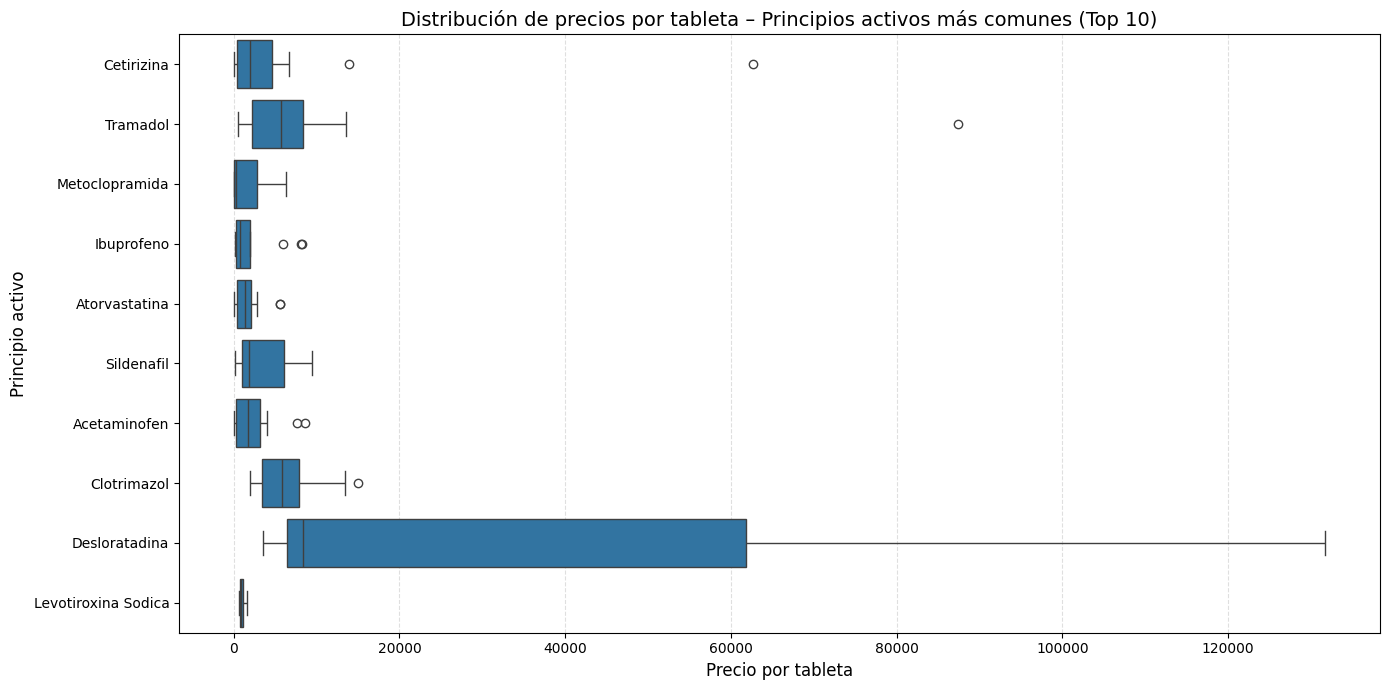

Diagnóstico rápido:
Filas totales: 1000
Filas válidas para boxplot: 122
Nulos en precio: 0
Mín/Máx precio válido: 0.4155778894 / 8096666.667


In [ ]:
# 5 Grafica:  Boxplot de precios por principio activo (Top 10 más comunes)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df
except NameError:
    import requests
    url = 'https://www.datos.gov.co/resource/3t73-n4q9.json'
    df = pd.DataFrame(requests.get(url).json())

cols_necesarias = {'principio_activo', 'precio_por_tableta'}
faltantes = cols_necesarias - set(df.columns)
if faltantes:
    raise KeyError(f"Faltan columnas en el DataFrame: {faltantes}")

df['precio_por_tableta'] = pd.to_numeric(
    df['precio_por_tableta'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

df_clean = df[['principio_activo', 'precio_por_tableta']].dropna()
df_clean = df_clean[df_clean['precio_por_tableta'] > 0]

principios_top = df_clean['principio_activo'].value_counts().head(10).index
df_plot = df_clean[df_clean['principio_activo'].isin(principios_top)]

if df_plot.empty:
    raise ValueError("No hay datos suficientes tras la limpieza para graficar el boxplot.")

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_plot,
    x='precio_por_tableta',
    y='principio_activo'
)

plt.title('Distribución de precios por tableta – Principios activos más comunes (Top 10)')
plt.xlabel('Precio por tableta')
plt.ylabel('Principio activo')
plt.tight_layout()
plt.show()

print("Diagnóstico rápido:")
print("Filas totales:", len(df))
print("Filas válidas para boxplot:", len(df_plot))
print("Nulos en precio:", df['precio_por_tableta'].isna().sum())
print("Mín/Máx precio válido:", df_clean['precio_por_tableta'].min(), "/", df_clean['precio_por_tableta'].max())